In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import xarray as xr
import pandas as pd
import numpy as np

In [3]:
pd.__version__

'1.5.3'

In [4]:
!pip install sklearn-xarray

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sklearn-xarray: filename=sklearn_xarray-0.4.0-py3-none-any.whl size=37250 sha256=394b0a6c867b1fed2b9cf04f1c586cf33ffc2db2afbc3b525fa9ddf78b3665cd
  Stored in directory: /root/.cache/pip/wheels/68/25/47/a53a508b74678c20c9010405d0d97a6908a6f52896a7208422
Successfully built sklearn-xarray


In [5]:
DataSet = xr.open_dataset("/content/drive/MyDrive/BTTAI_Project_Team_B/data_set_files/final_merged_dataset.nc")
DataSet

<xarray.Dataset>
Dimensions:        (lon: 600, lat: 258, year: 95)
Coordinates:
  * lon            (lon) float64 -171.9 -171.6 -171.4 ... -22.62 -22.38 -22.12
  * lat            (lat) float64 12.12 12.38 12.62 12.88 ... 75.88 76.12 76.38
  * year           (year) int32 2006 2007 2008 2009 2010 ... 2097 2098 2099 2100
Data variables:
    null_variable  (lat, lon, year) object ...
    maxHuss        (year, lat, lon) float32 ...
    maxPrec        (year, lat, lon) float32 ...
    maxTemp        (year, lat, lon) float32 ...
    meanHuss       (year, lat, lon) float32 ...
    meanPrec       (year, lat, lon) float32 ...
    meanRsds       (year, lat, lon) float32 ...
    meanTemp       (year, lat, lon) float32 ...
    minHuss        (year, lat, lon) float32 ...
    minPrec        (year, lat, lon) float32 ...
    minTemp        (year, lat, lon) float32 ...

In [6]:
#from here to next comment to produce normal df that works normally
DF = DataSet.to_dataframe()
DF.reset_index(inplace=True)
DF

,lon,lat,year,null_variable,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp
0,-171.875,12.125,2006,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-171.875,12.125,2007,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-171.875,12.125,2008,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-171.875,12.125,2009,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-171.875,12.125,2010,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14705995,-22.125,76.375,2096,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14705996,-22.125,76.375,2097,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14705997,-22.125,76.375,2098,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14705998,-22.125,76.375,2099,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
DF_addedNAN = DF.replace(to_replace='', value=np.nan)
DF_cut = DF_addedNAN.dropna(subset='null_variable')
DF_cut

,lon,lat,year,null_variable,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp
6,-171.875,12.125,2012,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4741935,-123.625,42.375,2016,N,0.011654,105.960533,26.388397,0.005507,6.155274,153.305527,10.587187,0.002397,0.0,-3.286926
4741936,-123.625,42.375,2017,N,0.011803,85.905983,29.279419,0.005343,4.472182,171.331619,10.389680,0.001644,0.0,-9.514435
4741937,-123.625,42.375,2018,N,0.009814,72.998009,30.796844,0.005438,4.736286,161.257980,10.564110,0.001954,0.0,-7.765411
4741938,-123.625,42.375,2019,N,0.013023,97.432259,30.924988,0.005415,5.072194,164.297592,9.816513,0.002111,0.0,-7.261536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937675,-70.625,41.375,2016,W,NaN,NaN,26.751831,NaN,NaN,NaN,14.819304,NaN,NaN,-6.257812
9962276,-70.375,41.625,2012,W,0.016457,61.203930,27.321991,0.006710,3.121149,161.962234,13.402172,0.001063,0.0,-6.914825
10061931,-69.375,45.875,2012,N,0.015842,67.623390,28.139374,0.004699,3.841122,163.459610,5.666577,0.000256,0.0,-21.737854
10159494,-68.375,44.625,2010,W,0.014918,43.269913,28.719238,0.005610,3.394894,163.678421,8.533190,0.000533,0.0,-20.052628


In [8]:
DF_cut.reset_index(inplace=True)
#this just reset the indexes so that it's 0-973 instead of 6-101000, df now normal

In [9]:
DF_cut.describe()

,index,lon,lat,year,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp
count,9.740000e+02,974.00000,974.000000,974.000000,972.000000,972.000000,973.000000,972.000000,972.000000,972.000000,973.000000,972.000000,972.0,973.000000
mean,7.781432e+06,-92.60729,38.486396,2014.775154,0.017503,58.702175,33.026882,0.007211,2.866724,175.534210,12.243366,0.001026,0.0,-16.062563
std,1.252049e+06,12.77458,4.963721,3.516480,0.003679,29.186914,3.463756,0.002124,1.256399,13.492815,4.215407,0.000637,0.0,7.405726
min,6.000000e+00,-171.87500,12.125000,2006.000000,0.006083,7.522016,20.461304,0.002689,0.111707,128.326752,2.319458,0.000000,0.0,-34.687546
25%,7.117411e+06,-99.37500,34.875000,2012.000000,0.015794,39.240311,30.395996,0.005539,2.036447,166.302170,8.790436,0.000542,0.0,-21.709610
50%,8.000196e+06,-90.37500,37.875000,2015.000000,0.018281,54.814003,33.281860,0.007311,3.084816,174.285583,12.653252,0.000856,0.0,-15.496002
75%,8.636454e+06,-83.87500,42.562500,2017.000000,0.020211,73.647888,35.589691,0.008716,3.653280,183.094696,15.523548,0.001362,0.0,-10.903961
max,1.015950e+07,-68.37500,48.875000,2022.000000,0.025260,211.241501,41.404266,0.012643,9.181305,228.566498,21.029755,0.003134,0.0,1.603363


In [10]:
#since only one or two rows are missing from any given column I'm just going to nuke them
DF_cut.dropna(inplace=True)
DF_cut.describe()

<ipython-input-10-87feced44937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_cut.dropna(inplace=True)


,index,lon,lat,year,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp
count,9.720000e+02,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.0,972.000000
mean,7.787220e+06,-92.548354,38.510545,2014.776749,0.017503,58.702175,33.033340,0.007211,2.866724,175.534210,12.240715,0.001026,0.0,-16.072649
std,1.226245e+06,12.512148,4.895347,3.518753,0.003679,29.186914,3.459677,0.002124,1.256399,13.492815,4.216766,0.000637,0.0,7.402848
min,4.741935e+06,-123.625000,28.875000,2006.000000,0.006083,7.522016,20.461304,0.002689,0.111707,128.326752,2.319458,0.000000,0.0,-34.687546
25%,7.117412e+06,-99.375000,34.875000,2012.000000,0.015794,39.240310,30.410347,0.005539,2.036447,166.302170,8.789058,0.000542,0.0,-21.715145
50%,8.000196e+06,-90.375000,37.875000,2015.000000,0.018281,54.814003,33.287704,0.007311,3.084816,174.285576,12.615516,0.000856,0.0,-15.501526
75%,8.636454e+06,-83.875000,42.625000,2017.000000,0.020211,73.647886,35.591339,0.008716,3.653280,183.094692,15.528036,0.001362,0.0,-10.920761
max,1.015950e+07,-68.375000,48.875000,2022.000000,0.025260,211.241501,41.404266,0.012643,9.181305,228.566498,21.029755,0.003134,0.0,1.603363


In [11]:
#commentary on above:
#mean temp looks fine, that's about 54 degrees F which seems legit. The max of 33 C seems alright as well, as does -16 C in min.
#Don't know enough about the other measurements to judge but that makes me think they're reasonable as well
DF_cut.rename({'null_variable':'label'}, axis=1,inplace=True)
DF_cut.columns

<ipython-input-11-32cd84776dbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_cut.rename({'null_variable':'label'}, axis=1,inplace=True)


Index(['index', 'lon', 'lat', 'year', 'label', 'maxHuss', 'maxPrec', 'maxTemp',
       'meanHuss', 'meanPrec', 'meanRsds', 'meanTemp', 'minHuss', 'minPrec',
       'minTemp'],
      dtype='object')

In [12]:
DF_cut['label'].value_counts

<bound method IndexOpsMixin.value_counts of 1      N
2      N
3      N
4      N
5      W
      ..
968    W
970    W
971    N
972    W
973    W
Name: label, Length: 972, dtype: object>

In [13]:
DF_cut['label'].replace(to_replace='W', value=1, inplace=True)
DF_cut['label'].replace(to_replace='N', value=-1,inplace=True)
DF_cut['label'].replace(to_replace='P', value=0,inplace=True)
#for purposes

<ipython-input-13-dceec85e1176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_cut['label'].replace(to_replace='W', value=1, inplace=True)
<ipython-input-13-dceec85e1176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_cut['label'].replace(to_replace='N', value=-1,inplace=True)
<ipython-input-13-dceec85e1176>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_cut['label'].replace(to_replace='P', value=0,inplace=True)


In [14]:
DF_cut.corr()
#the stronger correlation with longitude is not surprising, but the meanPrec having decent value could be good
#and year has like, anti-correlation
#and minPrec is just NaN but that is not because it contains NaN values so dunno what's up with that

,index,lon,lat,year,label,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp
index,1.000000,0.999999,-0.238041,-0.632604,0.347841,0.473140,0.317343,0.099643,0.397076,0.487019,-0.307440,0.303351,0.030636,NaN,0.274757
lon,0.999999,1.000000,-0.239471,-0.632196,0.347440,0.473841,0.317906,0.100048,0.398216,0.487199,-0.306503,0.304589,0.031549,NaN,0.275773
lat,-0.238041,-0.239471,1.000000,-0.119191,0.181424,-0.575799,-0.447164,-0.291348,-0.847137,-0.235210,-0.545067,-0.889128,-0.609907,NaN,-0.735850
year,-0.632604,-0.632196,-0.119191,1.000000,-0.323405,-0.025463,-0.062821,0.207387,0.061568,-0.339199,0.364381,0.150997,0.187288,NaN,0.032934
label,0.347841,0.347440,0.181424,-0.323405,1.000000,0.029679,-0.057918,-0.099798,-0.092475,0.149724,-0.303161,-0.125700,-0.186941,NaN,-0.027847
maxHuss,0.473140,0.473841,-0.575799,-0.025463,0.029679,1.000000,0.509960,0.686776,0.791441,0.272032,-0.034304,0.744477,0.207088,NaN,0.351973
maxPrec,0.317343,0.317906,-0.447164,-0.062821,-0.057918,0.509960,1.000000,0.306831,0.613628,0.617882,-0.134238,0.574087,0.435085,NaN,0.454061
maxTemp,0.099643,0.100048,-0.291348,0.207387,-0.099798,0.686776,0.306831,1.000000,0.476847,0.031043,-0.068380,0.523781,0.075581,NaN,0.058627
meanHuss,0.397076,0.398216,-0.847137,0.061568,-0.092475,0.791441,0.613628,0.476847,1.000000,0.482199,0.093940,0.941457,0.644931,NaN,0.735608
meanPrec,0.487019,0.487199,-0.235210,-0.339199,0.149724,0.272032,0.617882,0.031043,0.482199,1.000000,-0.477033,0.373602,0.470030,NaN,0.519166


In [15]:
DF_timesort = DF_cut.sort_values(by=['year'], axis=0, ignore_index=True)
DF_timesort.head(20)

,index,lon,lat,year,label,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp
0,9619510,-73.875,42.625,2006,1,0.017015,40.471222,30.513000,0.005916,2.886982,161.224152,8.644259,0.000274,0.0,-19.480423
1,9570490,-74.375,42.625,2006,1,0.015959,43.715347,29.204987,0.005495,2.958983,166.178879,8.109078,0.000522,0.0,-17.415009
2,9570206,-74.375,41.875,2007,1,0.016046,101.238533,28.122894,0.006004,5.037313,163.823944,9.263797,0.000717,0.0,-12.315369
3,9620081,-73.875,44.125,2007,1,0.015937,37.122993,28.376251,0.004725,3.856594,168.939346,7.016434,0.000223,0.0,-18.516098
4,9692756,-73.125,41.875,2007,1,0.016790,70.809029,29.423370,0.006074,4.298843,166.126556,10.285353,0.000548,0.0,-10.379761
5,9619891,-73.875,43.625,2007,1,0.016629,64.423050,29.686188,0.005337,3.855065,166.206818,7.814131,0.000533,0.0,-18.009552
6,9692946,-73.125,42.375,2007,1,0.015106,55.180580,29.123901,0.005634,3.912916,167.665115,9.126013,0.000540,0.0,-13.249756
7,9693231,-73.125,43.125,2007,1,0.017655,57.569809,29.965973,0.005295,4.358400,169.430786,8.390879,0.000261,0.0,-15.635376
8,9619511,-73.875,42.625,2007,1,0.016790,39.070564,30.344086,0.006206,2.981466,161.295273,9.350120,0.000610,0.0,-16.295532
9,9693421,-73.125,43.625,2007,1,0.017314,64.042702,30.018219,0.005425,3.712897,164.076645,8.297808,0.000291,0.0,-16.962860


In [16]:
DF_timesort.tail(20)

,index,lon,lat,year,label,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minPrec,minTemp
952,6016460,-110.625,42.375,2021,0,0.011268,34.484592,26.260345,0.003689,2.586567,220.805908,3.514513,0.000683,0.0,-21.061859
953,6336230,-107.375,45.375,2021,0,0.016685,12.979582,35.897888,0.004571,0.766367,179.023224,9.330608,0.000279,0.0,-22.969543
954,6067855,-110.125,48.625,2021,0,0.013539,21.812441,34.811279,0.003556,0.738408,169.253479,8.052920,0.000272,0.0,-30.921326
955,6043060,-110.375,47.875,2021,0,0.014635,20.016249,35.864197,0.004283,0.861732,167.819077,8.888479,0.000298,0.0,-24.943787
956,6165040,-109.125,46.375,2021,0,0.012222,25.699671,34.087158,0.004034,0.978164,176.508469,8.114050,0.000300,0.0,-23.617950
957,6190310,-108.875,48.375,2021,0,0.014539,17.245983,35.335938,0.004185,0.846225,169.471619,8.745233,0.000257,0.0,-27.658157
958,6776935,-102.875,44.125,2021,1,0.019345,15.910329,36.156525,0.005162,0.739763,177.302216,10.811569,0.000414,0.0,-17.950714
959,6798880,-102.625,37.375,2021,0,0.016323,33.130142,34.868744,0.005542,0.997615,206.759842,11.821157,0.000550,0.0,-14.375580
960,6212825,-108.625,43.125,2021,0,0.014248,24.280663,30.822479,0.003384,0.528427,196.986725,6.648942,0.000315,0.0,-22.918884
961,6678990,-103.875,44.375,2021,1,0.018676,40.160019,33.909363,0.005476,1.306994,187.265930,8.298838,0.000315,0.0,-20.980377


In [17]:
DF_timesort.drop('minPrec', axis=1, inplace=True)
DF_timesort.head(5)

,index,lon,lat,year,label,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minTemp
0,9619510,-73.875,42.625,2006,1,0.017015,40.471222,30.513000,0.005916,2.886982,161.224152,8.644259,0.000274,-19.480423
1,9570490,-74.375,42.625,2006,1,0.015959,43.715347,29.204987,0.005495,2.958983,166.178879,8.109078,0.000522,-17.415009
2,9570206,-74.375,41.875,2007,1,0.016046,101.238533,28.122894,0.006004,5.037313,163.823944,9.263797,0.000717,-12.315369
3,9620081,-73.875,44.125,2007,1,0.015937,37.122993,28.376251,0.004725,3.856594,168.939346,7.016434,0.000223,-18.516098
4,9692756,-73.125,41.875,2007,1,0.016790,70.809029,29.423370,0.006074,4.298843,166.126556,10.285353,0.000548,-10.379761


In [18]:
label = DF_timesort['label']
label.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [19]:
DF_timesort.drop('label', axis=1, inplace=True)
DF_timesort.head()

,index,lon,lat,year,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minTemp
0,9619510,-73.875,42.625,2006,0.017015,40.471222,30.513000,0.005916,2.886982,161.224152,8.644259,0.000274,-19.480423
1,9570490,-74.375,42.625,2006,0.015959,43.715347,29.204987,0.005495,2.958983,166.178879,8.109078,0.000522,-17.415009
2,9570206,-74.375,41.875,2007,0.016046,101.238533,28.122894,0.006004,5.037313,163.823944,9.263797,0.000717,-12.315369
3,9620081,-73.875,44.125,2007,0.015937,37.122993,28.376251,0.004725,3.856594,168.939346,7.016434,0.000223,-18.516098
4,9692756,-73.125,41.875,2007,0.016790,70.809029,29.423370,0.006074,4.298843,166.126556,10.285353,0.000548,-10.379761


In [20]:
DF_timesort.drop('index', axis=1, inplace=True)
DF_timesort.head()

,lon,lat,year,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minTemp
0,-73.875,42.625,2006,0.017015,40.471222,30.513000,0.005916,2.886982,161.224152,8.644259,0.000274,-19.480423
1,-74.375,42.625,2006,0.015959,43.715347,29.204987,0.005495,2.958983,166.178879,8.109078,0.000522,-17.415009
2,-74.375,41.875,2007,0.016046,101.238533,28.122894,0.006004,5.037313,163.823944,9.263797,0.000717,-12.315369
3,-73.875,44.125,2007,0.015937,37.122993,28.376251,0.004725,3.856594,168.939346,7.016434,0.000223,-18.516098
4,-73.125,41.875,2007,0.016790,70.809029,29.423370,0.006074,4.298843,166.126556,10.285353,0.000548,-10.379761


In [21]:
DF_timesort.shape

(972, 12)

In [22]:
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [82]:
scaler = StandardScaler()
ND_scaled = scaler.fit_transform(DF_timesort
 [['maxHuss','meanHuss','minHuss','maxPrec','meanPrec','maxTemp','meanTemp','minTemp']])
DF_scaled = pd.DataFrame(ND_scaled, columns=['maxHuss','meanHuss','minHuss','maxPrec','meanPrec','maxTemp','meanTemp','minTemp'])
DF_scaled.head(20)

,maxHuss,meanHuss,minHuss,maxPrec,meanPrec,maxTemp,meanTemp,minTemp
0,-0.132828,-0.609935,-1.181175,-0.624949,0.016132,-0.728865,-0.853333,-0.460570
1,-0.419924,-0.807850,-0.790837,-0.513742,0.073469,-1.107133,-0.980316,-0.181423
2,-0.396325,-0.568365,-0.485025,1.458128,1.728517,-1.420067,-0.706335,0.507807
3,-0.425917,-1.170751,-1.261762,-0.739725,0.788269,-1.346798,-1.239569,-0.330239
4,-0.193966,-0.535433,-0.751028,0.415018,1.140447,-1.043978,-0.463950,0.769409
5,-0.237932,-0.882590,-0.774302,0.196109,0.787051,-0.967973,-1.050298,-0.261778
6,-0.651954,-0.742383,-0.763671,-0.120719,0.833120,-1.130582,-0.739027,0.381522
7,0.041262,-0.902289,-1.201757,-0.038817,1.187875,-0.887061,-0.913453,0.059099
8,-0.193934,-0.473201,-0.653565,-0.672963,0.091373,-0.777714,-0.685853,-0.030123
9,-0.051520,-0.840787,-1.154338,0.183071,0.673837,-0.871952,-0.935536,-0.120314


In [24]:
DF_scaled['lat'] = DF_timesort['lat']
DF_scaled['lon'] = DF_timesort['lon']
DF_scaled['year'] = DF_timesort['year']
DF_scaled.head()
#great now I will cut him into pieces

,maxHuss,meanHuss,minHuss,maxPrec,meanPrec,maxTemp,meanTemp,minTemp,lat,lon,year
0,-0.132828,-0.609935,-1.181175,-0.624949,0.016132,-0.728865,-0.853333,-0.460570,42.625,-73.875,2006
1,-0.419924,-0.807850,-0.790837,-0.513742,0.073469,-1.107133,-0.980316,-0.181423,42.625,-74.375,2006
2,-0.396325,-0.568365,-0.485025,1.458128,1.728517,-1.420067,-0.706335,0.507807,41.875,-74.375,2007
3,-0.425917,-1.170751,-1.261762,-0.739725,0.788269,-1.346798,-1.239569,-0.330239,44.125,-73.875,2007
4,-0.193966,-0.535433,-0.751028,0.415018,1.140447,-1.043978,-0.463950,0.769409,41.875,-73.125,2007


In [25]:
DF_scaled.describe()

,maxHuss,meanHuss,minHuss,maxPrec,meanPrec,maxTemp,meanTemp,minTemp,lat,lon,year
count,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,972.000000,9.720000e+02,972.000000,972.000000,972.000000
mean,-3.924586e-09,-1.177376e-08,7.849171e-09,-7.849171e-09,1.569834e-08,-7.849171e-09,0.000000,1.962293e-09,38.510545,-92.548354,2014.776749
std,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515,1.000515e+00,4.895347,12.512148,3.518753
min,-3.105966e+00,-2.129479e+00,-1.611795e+00,-1.754434e+00,-2.193918e+00,-3.635746e+00,-2.354023,-2.515853e+00,28.875000,-123.625000,2006.000000
25%,-4.650176e-01,-7.871333e-01,-7.592819e-01,-6.671444e-01,-6.611790e-01,-7.585513e-01,-0.818977,-7.625985e-01,34.875000,-99.375000,2012.000000
50%,2.115617e-01,4.740201e-02,-2.659479e-01,-1.332850e-01,1.736742e-01,7.356060e-02,0.088929,7.718888e-02,37.875000,-90.375000,2015.000000
75%,7.364691e-01,7.090710e-01,5.282158e-01,5.123324e-01,6.263628e-01,7.397558e-01,0.779985,6.962916e-01,42.625000,-83.875000,2017.000000
max,2.109677e+00,2.558589e+00,3.313389e+00,5.228982e+00,5.028525e+00,2.420814e+00,2.085381,2.388961e+00,48.875000,-68.375000,2022.000000


In [26]:
(972/100)*10
#97 for test. the rest is for train

97.2

In [27]:
972-97
#0-874 cut, then 875-972 for the rest

875

In [28]:
X_train = DF_scaled.iloc[:875] #noniclusive
X_train.shape #good

(875, 11)

In [29]:
X_test = DF_scaled.iloc[875:973]
X_test.shape #good

(97, 11)

In [55]:
Y_train = label.iloc[:875]
Y_train.shape

(875,)

In [31]:
Y_test = label.iloc[875:973]
Y_test.shape #nice ok

(97,)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
svm_alpha = SVC(random_state=1234) #start with a default guy
svm_alpha.fit(X_train, Y_train)
pred_alpha = svm_alpha.predict(X_test)
acc_alpha = accuracy_score(Y_test, pred_alpha)
acc_alpha
#well it's bad but that's to be expected

0.20618556701030927

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
#time for some quality control
#gonna do some grid searching
#maybe some cross validation
parameter_grid = {"C":[0.1,0.5,1,5,10], "decision_function_shape":["ovr","ovo"],
                  "kernel":["poly","rbf","sigmoid"], "coef0":[-1, -0.5, 0, 0.5, 1]}
grid_svm = GridSearchCV(estimator=SVC(), param_grid=parameter_grid)
grid_svm.fit(X_train, Y_train)
grid_svm.best_estimator_.get_params()


{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 1,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
grid_svm.best_score_

0.6091428571428572

In [37]:
svm_beta = SVC(C=10, kernel="poly", decision_function_shape="ovr", coef0=1, class_weight="balanced")
svm_beta.fit(X_train, Y_train)
acc_beta = svm_beta.score(X_test, Y_test)

In [38]:
acc_beta

0.20618556701030927

In [39]:
svm_beta.classes_

array([-1,  0,  1])

In [40]:
svm_beta.class_weight_

array([0.66438876, 2.97619048, 0.86291913])

In [41]:
XTrain_reduced = X_train.drop(["year", "lat", "lon"], axis=1)
XTest_reduced = X_test.drop(["year", "lat", "lon"], axis=1)

In [42]:
svm_beta2 = SVC(C=10, kernel="poly", decision_function_shape="ovr", coef0=1, class_weight="balanced")
svm_beta2.fit(XTrain_reduced, Y_train)
acc_beta2 = svm_beta2.score(XTest_reduced, Y_test)
acc_beta2
#woah whole ten percent

0.30927835051546393

In [43]:
parameter_grid = {"C":[0.1,0.5,1,5,10], "decision_function_shape":["ovr","ovo"],
                  "kernel":["poly","rbf","sigmoid"], "coef0":[-1, -0.5, 0, 0.5, 1], "class_weight":["balanced", "None"]}
grid_svm2 = GridSearchCV(estimator=SVC(), param_grid=parameter_grid)
grid_svm2.fit(XTrain_reduced, Y_train)
grid_svm2.best_estimator_.get_params()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
750 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

{'C': 5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 1,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [44]:
svm_beta3 = SVC(C=5, kernel="poly", decision_function_shape="ovr", coef0=1, class_weight="balanced")
svm_beta3.fit(XTrain_reduced, Y_train)
acc_beta3 = svm_beta3.score(XTest_reduced, Y_test)
acc_beta3
#mm nice another 4

0.3402061855670103

In [45]:
parameter_grid = {"C":[0.1,0.5,1,5,10], "decision_function_shape":["ovr","ovo"],
                  "kernel":["poly","rbf","sigmoid"], "coef0":[-1, -0.5, 0, 0.5, 1],
                  "class_weight":["balanced"], "gamma":["scale","auto"]}
grid_svm2 = GridSearchCV(estimator=SVC(), param_grid=parameter_grid)
grid_svm2.fit(XTrain_reduced, Y_train)
grid_svm2.best_estimator_.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
svm_beta4 = SVC(C=0.4, kernel="sigmoid", gamma = "auto", decision_function_shape="ovr", coef0=0, class_weight="balanced")
svm_beta4.fit(XTrain_reduced, Y_train)
acc_beta4 = svm_beta4.score(XTest_reduced, Y_test)
acc_beta4
#the C I did manually since it's a lil extreme with it
#I also tried cutting the class weight, and that killed it by 20% so uh. Don't.

0.29896907216494845

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
beta3_pred = svm_beta3.predict(XTest_reduced)
cl_report = classification_report(Y_test, beta3_pred)
print(cl_report)

              precision    recall  f1-score   support

          -1       0.25      0.75      0.37        20
           0       0.44      0.16      0.24        43
           1       0.55      0.32      0.41        34

    accuracy                           0.34        97
   macro avg       0.41      0.41      0.34        97
weighted avg       0.44      0.34      0.32        97



In [49]:
beta2_pred = svm_beta2.predict(XTest_reduced)
cl_report = classification_report(Y_test, beta2_pred)
print(cl_report)

              precision    recall  f1-score   support

          -1       0.21      0.60      0.32        20
           0       0.39      0.16      0.23        43
           1       0.48      0.32      0.39        34

    accuracy                           0.31        97
   macro avg       0.36      0.36      0.31        97
weighted avg       0.38      0.31      0.30        97



In [50]:
cm_beta3 = confusion_matrix(Y_test, beta3_pred)


In [51]:
import matplotlib as plt

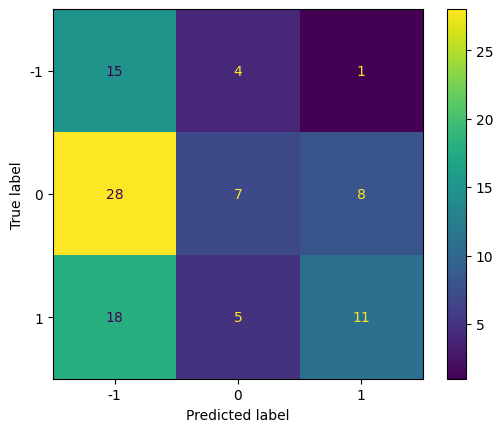

In [52]:
disp = ConfusionMatrixDisplay(cm_beta3, display_labels=svm_beta3.classes_)
disp.plot()


In [54]:
#adding locations and time back in, but scaled
scaler = StandardScaler()
ND_scaled = scaler.fit_transform(DF_timesort)
DF_scaled = pd.DataFrame(ND_scaled)
DF_scaled.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.493186,0.840915,-2.495562,-0.132828,-0.624949,-0.728865,-0.609935,0.016132,-1.061114,-0.853333,-1.181174,-0.460570
1,1.453204,0.840915,-2.495562,-0.419924,-0.513742,-1.107133,-0.807850,0.073469,-0.693712,-0.980316,-0.790837,-0.181423
2,1.453204,0.687630,-2.211224,-0.396325,1.458128,-1.420067,-0.568365,1.728517,-0.868335,-0.706335,-0.485025,0.507807
3,1.493186,1.147487,-2.211224,-0.425917,-0.739725,-1.346798,-1.170751,0.788269,-0.489019,-1.239569,-1.261762,-0.330239
4,1.553159,0.687630,-2.211224,-0.193966,0.415018,-1.043978,-0.535433,1.140447,-0.697592,-0.463950,-0.751028,0.769409
5,1.493186,1.045296,-2.211224,-0.237932,0.196109,-0.967973,-0.882590,0.787051,-0.691641,-1.050298,-0.774302,-0.261778
6,1.553159,0.789820,-2.211224,-0.651954,-0.120719,-1.130582,-0.742383,0.833120,-0.583505,-0.739027,-0.763671,0.381522
7,1.553159,0.943106,-2.211224,0.041262,-0.038817,-0.887061,-0.902289,1.187875,-0.452578,-0.913453,-1.201757,0.059099
8,1.493186,0.840915,-2.211224,-0.193934,-0.672963,-0.777714,-0.473201,0.091373,-1.055840,-0.685853,-0.653565,-0.030123
9,1.553159,1.045296,-2.211224,-0.051520,0.183071,-0.871952,-0.840787,0.673837,-0.849596,-0.935536,-1.154338,-0.120314


In [56]:
X_train = DF_scaled.iloc[:875] #noniclusive
X_train.shape #good
X_test = DF_scaled.iloc[875:973]
X_test.shape #good
Y_train = label.iloc[:875]
Y_train.shape
Y_test = label.iloc[875:973]
Y_test.shape #nice ok

(97,)

In [57]:
parameter_grid = {"C":[0.1,0.5,1,5,10], "decision_function_shape":["ovr","ovo"],
                  "kernel":["poly","rbf","sigmoid"], "coef0":[-1, -0.5, 0, 0.5, 1]}
grid_svm2 = GridSearchCV(estimator=SVC(), param_grid=parameter_grid)
grid_svm2.fit(X_train, Y_train)
grid_svm2.best_estimator_.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': -1,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [62]:
svm_1 = SVC(C=0.1, kernel="rbf", decision_function_shape="ovr", coef0=-1, class_weight="balanced")
svm_1.fit(X_train, Y_train)
acc_1 = svm_1.score(X_test, Y_test)
acc_1
#ah. worse

0.24742268041237114

In [63]:
weights = svm_beta3.class_weight_
names = svm_beta3.feature_names_in_

In [64]:
weights

array([0.66438876, 2.97619048, 0.86291913])

In [65]:
names

array(['maxHuss', 'meanHuss', 'minHuss', 'maxPrec', 'meanPrec', 'maxTemp',
       'meanTemp', 'minTemp'], dtype=object)

In [70]:
weights = [0.66438876, 2.97619048, 0.86291913, 0, 0, 0, 0, 0]

In [66]:
import matplotlib as plt

In [68]:
plt.__version__

'3.7.1'

<function matplotlib.pyplot.show(close=None, block=None)>

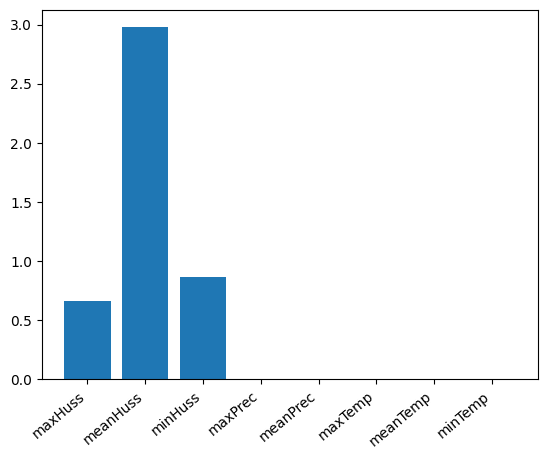

In [73]:
fig, ax = plt.pyplot.subplots()
ax.bar(names, weights)
for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
plt.pyplot.show

In [74]:
DF_timesort = DF_cut.sort_values(by=['year'], axis=0, ignore_index=True)

In [75]:
DF_timesort.drop('minPrec', axis=1, inplace=True)

In [79]:
DF_timesort.describe()

,index,lon,lat,year,label,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minTemp
count,9.720000e+02,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,7.787220e+06,-92.548354,38.510545,2014.776749,-0.089506,0.017503,58.702179,33.033340,0.007211,2.866724,175.534195,12.240716,0.001026,-16.072649
std,1.226245e+06,12.512148,4.895347,3.518753,0.920760,0.003679,29.186914,3.459677,0.002124,1.256399,13.492815,4.216766,0.000637,7.402848
min,4.741935e+06,-123.625000,28.875000,2006.000000,-1.000000,0.006083,7.522016,20.461304,0.002689,0.111707,128.326752,2.319458,0.000000,-34.687546
25%,7.117412e+06,-99.375000,34.875000,2012.000000,-1.000000,0.015794,39.240310,30.410347,0.005539,2.036447,166.302170,8.789058,0.000542,-21.715145
50%,8.000196e+06,-90.375000,37.875000,2015.000000,0.000000,0.018281,54.814003,33.287704,0.007311,3.084816,174.285576,12.615516,0.000856,-15.501526
75%,8.636454e+06,-83.875000,42.625000,2017.000000,1.000000,0.020211,73.647886,35.591339,0.008716,3.653280,183.094692,15.528036,0.001362,-10.920761
max,1.015950e+07,-68.375000,48.875000,2022.000000,1.000000,0.025260,211.241501,41.404266,0.012643,9.181305,228.566498,21.029755,0.003134,1.603363


In [81]:
DF_binary = DF_timesort.drop(DF_timesort[DF_timesort['label']==0].index)
DF_binary.describe()

,index,lon,lat,year,label,maxHuss,maxPrec,maxTemp,meanHuss,meanPrec,meanRsds,meanTemp,minHuss,minTemp
count,8.310000e+02,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,7.824094e+06,-92.172533,38.588899,2014.333333,-0.104693,0.017402,58.957958,32.900036,0.007162,2.909985,175.043640,12.103907,0.001021,-16.212555
std,1.249681e+06,12.750661,4.808898,3.451325,0.995103,0.003733,29.523134,3.530038,0.002099,1.247728,13.488568,4.204376,0.000629,7.287026
min,4.741935e+06,-123.625000,28.875000,2006.000000,-1.000000,0.006083,7.522016,20.461304,0.002689,0.233195,128.326752,2.319458,0.000000,-34.687546
25%,7.165762e+06,-98.875000,35.375000,2012.000000,-1.000000,0.015591,39.695728,30.192200,0.005512,2.096154,166.135178,8.716194,0.000546,-21.417007
50%,8.027792e+06,-90.125000,38.125000,2014.000000,-1.000000,0.018155,54.294113,33.099701,0.007284,3.110414,173.856720,12.096918,0.000851,-15.612915
75%,8.683867e+06,-83.375000,42.375000,2017.000000,1.000000,0.020177,73.191185,35.557220,0.008627,3.683570,182.464043,15.133343,0.001346,-11.411850
max,1.015950e+07,-68.375000,48.875000,2022.000000,1.000000,0.025260,211.241501,41.404266,0.012548,9.181305,228.566498,21.029755,0.003134,1.603363


In [84]:
label = DF_binary['label']
DF_binary.drop('label', axis=1, inplace=True)

In [85]:
DF_timesort.drop('index', axis=1, inplace=True)

In [86]:
scaler = StandardScaler()
ND_scaled = scaler.fit_transform(DF_binary
 [['maxHuss','meanHuss','minHuss','maxPrec','meanPrec','maxTemp','meanTemp','minTemp']])
DF_scaled = pd.DataFrame(ND_scaled, columns=['maxHuss','meanHuss','minHuss','maxPrec','meanPrec','maxTemp','meanTemp','minTemp'])
DF_scaled.head(20)

,maxHuss,meanHuss,minHuss,maxPrec,meanPrec,maxTemp,meanTemp,minTemp
0,-0.103692,-0.594144,-1.188519,-0.626555,-0.018447,-0.676614,-0.823364,-0.448720
1,-0.386672,-0.794505,-0.793521,-0.516605,0.039293,-1.047376,-0.950732,-0.165112
2,-0.363411,-0.552061,-0.484059,1.432979,1.705988,-1.354099,-0.675920,0.535134
3,-0.392579,-1.161891,-1.270068,-0.740034,0.759123,-1.282284,-1.210771,-0.316306
4,-0.163954,-0.518722,-0.753237,0.401658,1.113780,-0.985474,-0.432799,0.800917
5,-0.207289,-0.870169,-0.776789,0.185224,0.757896,-0.910977,-1.020927,-0.246751
6,-0.615375,-0.728229,-0.766031,-0.128023,0.804290,-1.070360,-0.708711,0.406830
7,0.067902,-0.890111,-1.209347,-0.047047,1.161541,-0.831671,-0.883666,0.079254
8,-0.163922,-0.455720,-0.654610,-0.674026,0.057323,-0.724494,-0.655376,-0.011394
9,-0.023550,-0.827849,-1.161362,0.172333,0.643886,-0.816862,-0.905816,-0.103027


In [87]:
DF_scaled.shape

(831, 8)

In [88]:
label.shape

(831,)

In [89]:
831*0.1

83.10000000000001

In [90]:
831-83

748

In [91]:
X_train = DF_scaled.iloc[:748] #noniclusive
X_train.shape #good
X_test = DF_scaled.iloc[748:832]
X_test.shape #good
Y_train = label.iloc[:748]
Y_train.shape
Y_test = label.iloc[748:832]
Y_test.shape #nice ok

(83,)

In [92]:
parameter_grid = {"C":[0.1,0.5,1,5,10], "decision_function_shape":["ovr","ovo"],
                  "kernel":["poly","rbf","sigmoid"], "coef0":[-1, -0.5, 0, 0.5, 1]}
grid_svm2 = GridSearchCV(estimator=SVC(), param_grid=parameter_grid)
grid_svm2.fit(X_train, Y_train)
grid_svm2.best_estimator_.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': -1,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [93]:
svm_2 = SVC(C=0.1, kernel="rbf", decision_function_shape="ovr", coef0=-1, class_weight="balanced")
svm_2.fit(X_train, Y_train)
acc_2 = svm_2.score(X_test, Y_test)
acc_2

0.4578313253012048

In [94]:
svm2_pred = svm_2.predict(X_test)
cl_report2 = classification_report(Y_test, svm2_pred)
print(cl_report2)

              precision    recall  f1-score   support

          -1       0.44      0.97      0.61        36
           1       0.75      0.06      0.12        47

    accuracy                           0.46        83
   macro avg       0.60      0.52      0.36        83
weighted avg       0.62      0.46      0.33        83



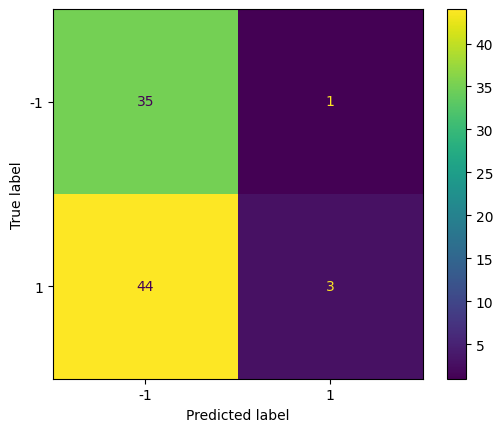

In [95]:
cm_svm2 = confusion_matrix(Y_test, svm2_pred)
disp = ConfusionMatrixDisplay(cm_svm2, display_labels=svm_2.classes_)
disp.plot()
